# Vaccination Data

Author: Daniel Cushing
UIUC -- Scientific Visualizations -- Fall 2021

In this exercise of data visualization we will explore the COVID-19 Vaccination dataset from Our World In Data (https://github.com/owid/covid-19-data). Our goal is to visualize vaccination data using an interactive map. Let's start with some data analysis.

For a look at the final visualization refer to:
- https://stay-vaccinated.herokuapp.com/
- https://github.com/cushind/stay-vaccinated

In [1]:
import numpy as np
import pandas as pd

In [2]:
vaccinations = pd.read_csv('./vaccinations/vaccinations.csv')
vaccinations.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003


## Exploratory Data Analysis

Let's start by exploring our data. We want to know information about: what countries our in our dataset, what is the date range of our data, and what distinguishes the different vaccination records. We also want to know if it's necessary to perform any data cleaning.

In [3]:
print(vaccinations.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67739 entries, 0 to 67738
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   location                             67739 non-null  object 
 1   iso_code                             67739 non-null  object 
 2   date                                 67739 non-null  object 
 3   total_vaccinations                   38041 non-null  float64
 4   people_vaccinated                    36405 non-null  float64
 5   people_fully_vaccinated              33475 non-null  float64
 6   total_boosters                       9745 non-null   float64
 7   daily_vaccinations_raw               31842 non-null  float64
 8   daily_vaccinations                   67378 non-null  float64
 9   total_vaccinations_per_hundred       38041 non-null  float64
 10  people_vaccinated_per_hundred        36405 non-null  float64
 11  people_fully_vaccinated_per_

#### Unique Contries/Locations

In [4]:
uniq_locations = vaccinations['location'].unique()
num_locations = len(uniq_locations)
print(f'Number of unique locations: {num_locations}')

Number of unique locations: 235


In [5]:
# list countries not represented in our data
import pycountry

country_list = list(pycountry.countries)
country_list = [country.name for country in country_list]

countries_not_included = list(set(country_list)-set(uniq_locations))
print(f'Number of countries not represented in our data: {len(countries_not_included)}')

countries_not_included[0:10]

Number of countries not represented in our data: 55


['Saint Pierre and Miquelon',
 'Antarctica',
 'Martinique',
 'Palestine, State of',
 'American Samoa',
 'Eritrea',
 'British Indian Ocean Territory',
 'Viet Nam',
 'Virgin Islands, British',
 'Micronesia, Federated States of']

----
#### The Greatest Red Crab Migration on Earth

Every year, the greatest migration of red crabs appears on Christmas Island, a small Australian territory in the Indian Ocean, lying south of Java, Indonesia. During the first rainfall of the wet season, **millions** of male and female crabs leave the forests of the island and march to the shore to spawn the next generation of Red Crabs. 

"In some areas you might see up to 100 crabs per square metre of beach or rock."

Sources:
- [Red Crab Migration](https://parksaustralia.gov.au/christmas/discover/highlights/red-crab-migration/)
- [Wikipedia](https://en.wikipedia.org/wiki/Christmas_Island)
- [Google Maps](https://www.google.com/maps/place/6798,+Christmas+Island/data=!4m2!3m1!1s0x2ef59a27e3c0a7cf:0x15e7d6090475ea16?sa=X&ved=2ahUKEwiq16brqeL0AhWBAp0JHbB2BCYQ8gF6BAhHEAE)

----

#### Date Range

In [ ]:
vaccinations.sort_values(['date', 'location']).head()
# output ommitted

It looks like we have some data dating back to 2020-12-01, however it seems to be placeholder values. We also notice that some locations are not countries. For example `High income`. Let's see if we can get a better date range, and to do this we'll first check our last day in the dataset.

In [7]:
vaccinations.sort_values(['date'], ascending=False).head(1)

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
67738,Zimbabwe,ZWE,2021-12-12,6933837.0,3956872.0,2976965.0,NaN,22139.0,24893.0,45.94,26.22,19.73,NaN,1649.0,11618.0,0.077


In [8]:
# obtaining a better date range. Let's try between Jan 1, 2021 and Current

vaccinations_2021 = vaccinations[vaccinations['date'] >= '2021-01-01']
vaccinations_2021.sort_values('date').head(1)

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
35201,Lithuania,LTU,2021-01-01,9755.0,9755.0,NaN,NaN,0.0,1468.0,0.36,0.36,NaN,NaN,546.0,1468.0,0.055


##### Date Range Validations

Let's validate that we have data for each of the unique 235 locations on the last day of our data. 

In [9]:
vaccinations_current = vaccinations[vaccinations['date'] == '2021-12-12']
print(f'Number of locations with vaccinations recorded on 2021-12-12: { len(vaccinations_current["location"].unique()) }')

Number of locations with vaccinations recorded on 2021-12-12: 65


Let's test a few of the latest days to see if we ever get a full vaccination record for every location

In [10]:
vaccinations_latest = vaccinations[vaccinations['date'] >= '2021-12-01']
latest_dates = vaccinations_latest['date'].unique()

for d in latest_dates:
	print(f'Number of locations with vaccinations recorded on {d}: { len(vaccinations[vaccinations["date"] == d]["location"].unique()) }')

Number of locations with vaccinations recorded on 2021-12-01: 197
Number of locations with vaccinations recorded on 2021-12-02: 195
Number of locations with vaccinations recorded on 2021-12-03: 193
Number of locations with vaccinations recorded on 2021-12-04: 184
Number of locations with vaccinations recorded on 2021-12-05: 181
Number of locations with vaccinations recorded on 2021-12-06: 168
Number of locations with vaccinations recorded on 2021-12-07: 155
Number of locations with vaccinations recorded on 2021-12-08: 147
Number of locations with vaccinations recorded on 2021-12-09: 130
Number of locations with vaccinations recorded on 2021-12-10: 102
Number of locations with vaccinations recorded on 2021-12-11: 83
Number of locations with vaccinations recorded on 2021-12-12: 65


- We would have to search too far back to get a date where we have vaccination records for all of the 235 unique locations. Instead we will have to generate a dataframe that has the highest recorded vaccination count for each location and the recorded date.

Lastly, let's distill our vaccination dataset down to contain only the important columns for our visualization, and let's make sure we get the last recorded vaccination count and the date.

In [11]:
colnames = ['iso_code', 'date', 'people_vaccinated', 'people_fully_vaccinated']

vaccinations = vaccinations.sort_values(['date'], ascending=False)
vaccinations = vaccinations[colnames]

def get_current_location_data(iso_code):
	location_vaccinations = vaccinations[vaccinations['iso_code'] == iso_code].sort_values(['date'], ascending=False)
	for _, row in location_vaccinations.iterrows():
		if row['people_vaccinated'] > 0:
			return row


pd.options.display.float_format = '{:.1f}'.format
vaccinations_current = pd.DataFrame(columns = colnames)
iso_uniq = vaccinations['iso_code'].unique()
for iso in iso_uniq:
	vaccinations_current = vaccinations_current.append(get_current_location_data(iso), ignore_index=True)

vaccinations_current

,iso_code,date,people_vaccinated,people_fully_vaccinated
0,ZWE,2021-12-12,3956872.0,2976965.0
1,BRA,2021-12-12,165093216.0,139421689.0
2,MNE,2021-12-12,279793.0,263776.0
3,JPN,2021-12-12,100068828.0,98049848.0
4,JAM,2021-12-12,695900.0,538182.0
...,...,...,...,...
230,NRU,2021-08-31,7612.0,7251.0
231,TKM,2021-08-29,4374694.0,3206282.0
232,NIU,2021-08-02,1202.0,1150.0
233,SHN,2021-05-05,4361.0,3531.0



----

Finally, as part of our goal for this project we wanted to approximate the percentage of the overall population that has been vaccinated. Let's read in one more dataset. 

## Population Totals

We will use the population dataset composed by The World Bank: https://data.worldbank.org/indicator/SP.POP.TOTL. This dataset shows total population based on the de facto definition of population, which counts all residents regardless of legal status or citizenship (the values shown are midyear estimates). 

In [12]:
population = pd.read_csv('./population/population_totals.csv')
population.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,NaN


In [13]:
population['Indicator Name'].unique()

array(['Population, total'], dtype=object)

In [14]:
# Let's reduce our dataframe down to the columns we care about

population = population[['Country Name','Country Code', '2020']]
population = population.rename(columns={"Country Name": "location", "Country Code": "iso_code", "2020" : "total_population"})

Finally, let's add 1% population growth to our 2020 total population, because (1) our vaccination data is current to 12-12-2020 and (2) the population data is based on midyear counts
- https://ourworldindata.org/world-population-growth

In [15]:
population['total_population'] = population['total_population'].mul(1.01).apply(np.floor)
population

,location,iso_code,total_population
0,Aruba,ABW,107833.0
1,Africa Eastern and Southern,AFE,684015731.0
2,Afghanistan,AFG,39317624.0
3,Africa Western and Central,AFW,463391510.0
4,Angola,AGO,33194930.0
...,...,...,...
261,Kosovo,XKX,1793131.0
262,"Yemen, Rep.",YEM,30124227.0
263,South Africa,ZAF,59901776.0
264,Zambia,ZMB,18567795.0



----

## Generating Data For Interactive Map

Finally let's quickly prepare our data for an interactive map so we can focus on cool data visualizations. We'll start with mergin our datasets.

In [16]:
vaccinations_current = pd.merge(vaccinations_current, population, on = 'iso_code')
vaccinations_current

,iso_code,date,people_vaccinated,people_fully_vaccinated,location,total_population
0,ZWE,2021-12-12,3956872.0,2976965.0,Zimbabwe,15011556.0
1,BRA,2021-12-12,165093216.0,139421689.0,Brazil,214685003.0
2,MNE,2021-12-12,279793.0,263776.0,Montenegro,627935.0
3,JPN,2021-12-12,100068828.0,98049848.0,Japan,127094381.0
4,JAM,2021-12-12,695900.0,538182.0,Jamaica,2990772.0
...,...,...,...,...,...,...
199,BIH,2021-11-04,833233.0,720631.0,Bosnia and Herzegovina,3313623.0
200,TUV,2021-10-22,6230.0,5884.0,Tuvalu,11909.0
201,MCO,2021-09-16,26672.0,23308.0,Monaco,39636.0
202,NRU,2021-08-31,7612.0,7251.0,Nauru,10942.0


In [17]:
vaccinations_current[vaccinations_current['people_vaccinated'] > vaccinations_current['total_population']]

,iso_code,date,people_vaccinated,people_fully_vaccinated,location,total_population
117,GIB,2021-12-08,41025.0,39870.0,Gibraltar,34027.0


Let's correct one error in our data, where a country has a higher vaccination count than population.

In [18]:
vaccinations_current.drop(vaccinations_current[vaccinations_current['iso_code'] == "GIB"].index, inplace = True)
vaccinations_current[vaccinations_current['people_vaccinated'] > vaccinations_current['total_population']]

,iso_code,date,people_vaccinated,people_fully_vaccinated,location,total_population


In [19]:
vaccinations_current

,iso_code,date,people_vaccinated,people_fully_vaccinated,location,total_population
0,ZWE,2021-12-12,3956872.0,2976965.0,Zimbabwe,15011556.0
1,BRA,2021-12-12,165093216.0,139421689.0,Brazil,214685003.0
2,MNE,2021-12-12,279793.0,263776.0,Montenegro,627935.0
3,JPN,2021-12-12,100068828.0,98049848.0,Japan,127094381.0
4,JAM,2021-12-12,695900.0,538182.0,Jamaica,2990772.0
...,...,...,...,...,...,...
199,BIH,2021-11-04,833233.0,720631.0,Bosnia and Herzegovina,3313623.0
200,TUV,2021-10-22,6230.0,5884.0,Tuvalu,11909.0
201,MCO,2021-09-16,26672.0,23308.0,Monaco,39636.0
202,NRU,2021-08-31,7612.0,7251.0,Nauru,10942.0


Our final prepared datset has 203 unique locations, and both vaccination and population data for all of them. Now we can buld our visualizations.

## Building our Visualizations

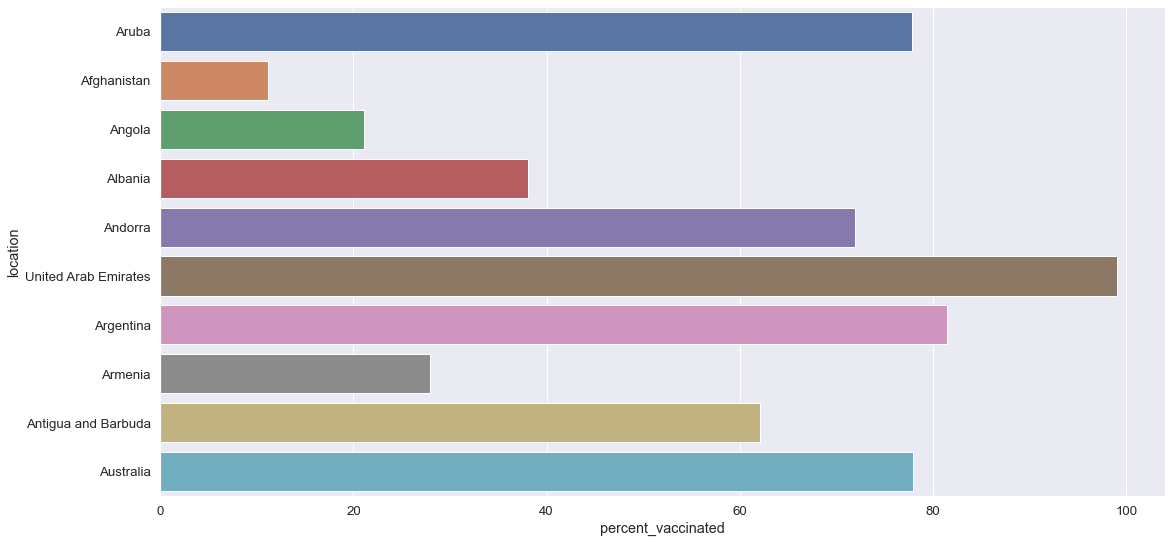

In [20]:
import seaborn as sns

sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(18, 9)})
sns.set(font_scale = 1.2)

vaccinations_current['percent_vaccinated'] = (vaccinations_current['people_vaccinated'] / vaccinations_current['total_population']) * 100
vaccinations_current = vaccinations_current.sort_values('iso_code')
ax = sns.barplot(x='percent_vaccinated', y='location', data=vaccinations_current.iloc[0:10])


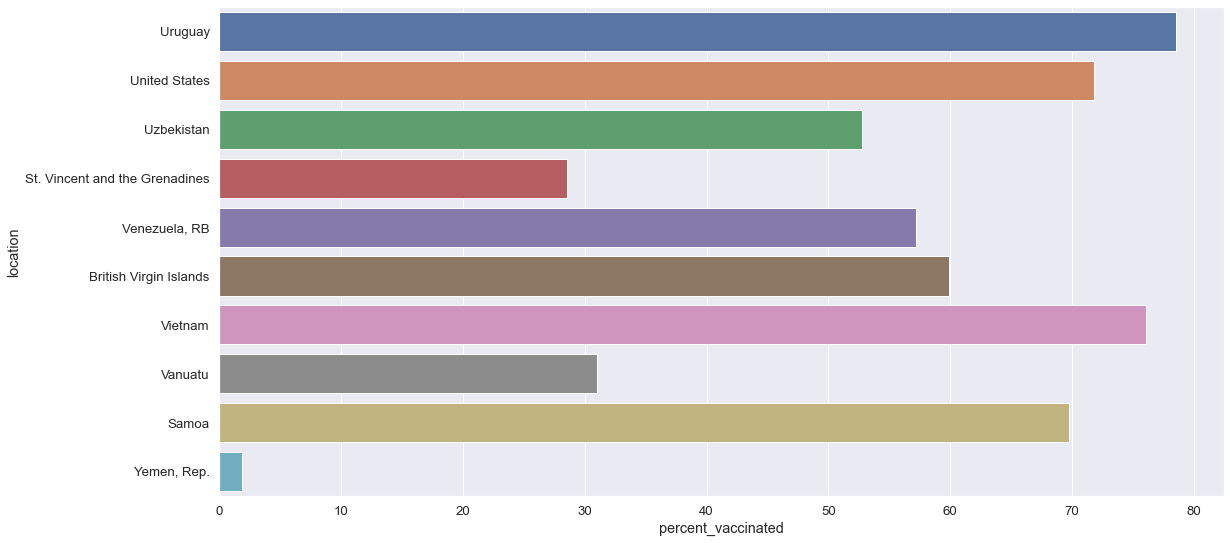

In [21]:
ax = sns.barplot(x='percent_vaccinated', y='location', data=vaccinations_current.iloc[190:200])

#### Is 0.72 percent high for the United States?

A quick google search reveals that is indeed that number of people with at lease one dose in the United States: https://www.mayoclinic.org/coronavirus-covid-19/vaccine-tracker. Awesome, that gives us a little confidence that our data is accurate. Let's spot check a few other countries.

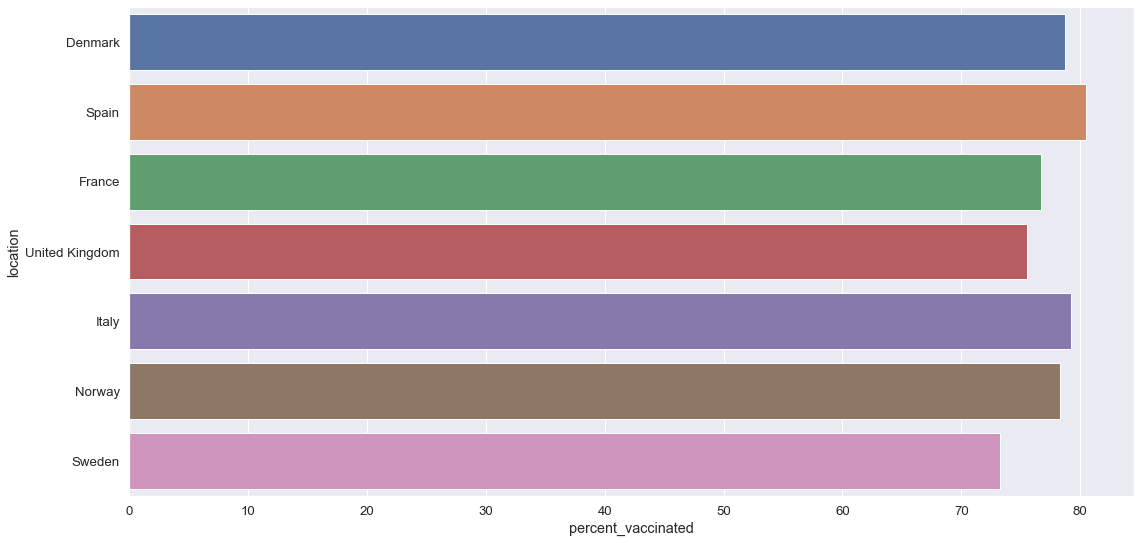

In [22]:
ax = sns.barplot(x='percent_vaccinated', y='location', data=vaccinations_current[vaccinations_current['location'].isin(['Italy', 'Spain', 'German', 'France', 'Norway', 'Sweden', 'Denmark', 'United Kingdom'])])

Some various google searching reveals that these numbers are pretty accurate. Yay!

## The Interactive Map

In [107]:
import plotly.graph_objects as go

vaccinations_current['hover_text'] = 'Location: ' + vaccinations_current['location'] + '<br>Population: ' + vaccinations_current["total_population"].astype(str) + '<br>Percent Vaccinated: ' + vaccinations_current["percent_vaccinated"].astype(str)

layout = {
    'title': go.layout.Title({
        'text': 'Global Covid Vaccination Rates',
        'font': {
            'color': 'white'
        }
    }),
    'legend': go.layout.Legend(
        {
            'font': {
                'color': 'white'
            }
        }
    ),
    'height': 1000,
    'width': 1400,
    'paper_bgcolor': 'rgba(0,0,0,0.9)',
    'geo': go.layout.Geo({
        'bgcolor': 'rgba(0,0,0,0.9)',
        'showocean': True,
        'oceancolor': 'rgba(51,153,255,0.9)',
        'showland': True,
        'landcolor': 'rgb(40,40,43,1)',
        'resolution': 50,
        'scope': 'world',
        'showframe': True,
        'showcoastlines': True,
        'showcountries': True,
        'projection_type': 'orthographic',
    }),
}


colors = ['rgba(108,40,117,1)', 'rgba(129,92,143,1)', 'rgba(163,137,173,1)', 'rgba(202,183,201,1)', 'rgba(224,224,224,1)', 
    'rgba(184,207,181,1)', 'rgba(161,203,151,1)', 'rgba(77,162,91,1)', 'rgba(19,108,53,1)', 'rgba(8,93,23,1)']
data = [ 
    go.Scattergeo(
        locationmode = 'ISO-3',
        locations = vaccinations_current[vaccinations_current['percent_vaccinated'] < 10]['iso_code'],
        text = vaccinations_current[vaccinations_current['percent_vaccinated'] < 10]['percent_vaccinated'],
        hovertext = vaccinations_current[vaccinations_current['percent_vaccinated'] < 10]['hover_text'],
        name = '<10',
        mode = 'markers',
        marker=dict(
            size=10,
            sizemode='area',
            opacity=0.9,
            color = colors[1]
        )
    ),
    go.Scattergeo(
        locationmode = 'ISO-3',
        locations = vaccinations_current[vaccinations_current['percent_vaccinated'].between(10, 20, inclusive='left')]['iso_code'],
        text = vaccinations_current[vaccinations_current['percent_vaccinated'].between(10, 20, inclusive='left')]['percent_vaccinated'],
        hovertext = vaccinations_current[vaccinations_current['percent_vaccinated'].between(10, 20, inclusive='left')]['hover_text'],
        name = '10-20',
        mode = 'markers',
        marker=dict(
            size=15,
            sizemode='area',
            opacity=0.9,
            color = colors[2]
        )
    ),
    go.Scattergeo(
        locationmode = 'ISO-3',
        locations = vaccinations_current[vaccinations_current['percent_vaccinated'].between(20, 30, inclusive='left')]['iso_code'],
        text = vaccinations_current[vaccinations_current['percent_vaccinated'].between(20, 30, inclusive='left')]['percent_vaccinated'],
        hovertext = vaccinations_current[vaccinations_current['percent_vaccinated'].between(20, 30, inclusive='left')]['hover_text'],
        name = '20-30',
        mode = 'markers',
        marker=dict(
            size=20,
            sizemode='area',
            opacity=0.9,
            color = colors[3]
        )
    ),
    go.Scattergeo(
        locationmode = 'ISO-3',
        locations = vaccinations_current[vaccinations_current['percent_vaccinated'].between(30, 40, inclusive='left')]['iso_code'],
        text = vaccinations_current[vaccinations_current['percent_vaccinated'].between(30, 40, inclusive='left')]['percent_vaccinated'],
        hovertext = vaccinations_current[vaccinations_current['percent_vaccinated'].between(30, 40, inclusive='left')]['hover_text'],
        name = '30-40',
        mode = 'markers',
        marker=dict(
            size=25,
            sizemode='area',
            opacity=0.9,
            color = colors[4]
        )
    ),
    go.Scattergeo(
        locationmode = 'ISO-3',
        locations = vaccinations_current[vaccinations_current['percent_vaccinated'].between(40, 50, inclusive='left')]['iso_code'],
        text = vaccinations_current[vaccinations_current['percent_vaccinated'].between(40, 50, inclusive='left')]['percent_vaccinated'],
        hovertext = vaccinations_current[vaccinations_current['percent_vaccinated'].between(40, 50, inclusive='left')]['hover_text'],
        name = '40-50',
        mode = 'markers',
        marker=dict(
            size=30,
            sizemode='area',
            opacity=0.9,
            color = colors[5]
        )
    ),
    go.Scattergeo(
        locationmode = 'ISO-3',
        locations = vaccinations_current[vaccinations_current['percent_vaccinated'].between(50, 60, inclusive='left')]['iso_code'],
        text = vaccinations_current[vaccinations_current['percent_vaccinated'].between(50, 60, inclusive='left')]['percent_vaccinated'],
        hovertext = vaccinations_current[vaccinations_current['percent_vaccinated'].between(50, 60, inclusive='left')]['hover_text'],
        name = '50-60',
        mode = 'markers',
        marker=dict(
            size=35,
            sizemode='area',
            opacity=0.9,
            color = colors[6]
        )
    ),
    go.Scattergeo(
        locationmode = 'ISO-3',
        locations = vaccinations_current[vaccinations_current['percent_vaccinated'].between(60, 70, inclusive='left')]['iso_code'],
        text = vaccinations_current[vaccinations_current['percent_vaccinated'].between(60, 70, inclusive='left')]['percent_vaccinated'],
        hovertext = vaccinations_current[vaccinations_current['percent_vaccinated'].between(60, 70, inclusive='left')]['hover_text'],
        name = '60-70',
        mode = 'markers',
        marker=dict(
            size=40,
            sizemode='area',
            opacity=0.9,
            color = colors[6]
        )
    ),
    go.Scattergeo(
        locationmode = 'ISO-3',
        locations = vaccinations_current[vaccinations_current['percent_vaccinated'].between(70, 80, inclusive='left')]['iso_code'],
        text = vaccinations_current[vaccinations_current['percent_vaccinated'].between(70, 80, inclusive='left')]['percent_vaccinated'],
        hovertext = vaccinations_current[vaccinations_current['percent_vaccinated'].between(70, 80, inclusive='left')]['hover_text'],
        name = '70-80',
        mode = 'markers',
        marker=dict(
            size=45,
            sizemode='area',
            opacity=0.9,
            color = colors[7]
        )
    ),
    go.Scattergeo(
        locationmode = 'ISO-3',
        locations = vaccinations_current[vaccinations_current['percent_vaccinated'].between(80, 90, inclusive='left')]['iso_code'],
        text = vaccinations_current[vaccinations_current['percent_vaccinated'].between(80, 90, inclusive='left')]['percent_vaccinated'],
        hovertext = vaccinations_current[vaccinations_current['percent_vaccinated'].between(80, 90, inclusive='left')]['hover_text'],
        name = '80-90',
        mode = 'markers',
        marker=dict(
            size=50,
            sizemode='area',
            opacity=0.9,
            color = colors[8]
        )
    ),
    go.Scattergeo(
        locationmode = 'ISO-3',
        locations = vaccinations_current[vaccinations_current['percent_vaccinated'] >= 90]['iso_code'],
        text = vaccinations_current[vaccinations_current['percent_vaccinated'] >= 90]['percent_vaccinated'],
        hovertext = vaccinations_current[vaccinations_current['percent_vaccinated'] >= 90]['hover_text'],
        name = '>=90',
        mode = 'markers',
        marker=dict(
            size=np.log1p(vaccinations_current[vaccinations_current['percent_vaccinated'] >= 90]['percent_vaccinated'])**2,
            sizemode='area',
            opacity=0.9,
            color = colors[9]
        )
    ),
]

fig = go.Figure(data=data, layout=layout)

fig.show()
    

## Concluding Thoughts

For our final visualization I wanted to use muted colors for the background and land, a blushish color for the ocean, and finally I wanted to represent the vaccination data in two forms. Firstly, was to scale the bubble size with the vaccination rate. Secondly, I used different colors to represent different vaccination percentiles. The outcome creates the effect large green bubbles or regions in which there are higher vaccination rates.

To conclude, In this writeup we outlined our data exploration, data cleaning, and visualizations. We showed multiple forms of visualizations and achieved our desired outcome of a interactive map that effectively shows vaccinations rates by country. And most importantly, we learned about the greatest Red Crab Migration on earth.

## Resources

- See the live map in action at: https://stay-vaccinated.herokuapp.com/
- Github: https://github.com/cushind/stay-vaccinated